In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
NUM_TRIALS = 1000000
BANDIT_PROBS = [0.2, 0.4, 0.3, 0.1]

In [4]:
class Bandit:
  def __init__(self, win_rate):
    self.win_rate = win_rate
    self.win_rate_estimate = 0
    self.number_of_samples = 0

  def pull(self):
    # draw a 1 with probability of win_rate
    return np.random.random() < self.win_rate

  def update(self, new_sample):
    self.number_of_samples += 1
    self.win_rate_estimate = self.win_rate_estimate + (new_sample - self.win_rate_estimate) / self.number_of_samples

In [10]:
def ucb(mean, total_size, bandit_size):
  return mean + np.power(2 * np.log(total_size) / bandit_size, 1 / 2)

In [14]:
def ucb_experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBS]
  rewards = np.zeros(NUM_TRIALS)
  total_plays = 0

  # Initialization: play all bandits once
  for i in range(len(bandits)):
      # pull the arm for the bandit with the largest sample
      x = bandits[i].pull()
      # update total plays
      total_plays += 1
      # update the distribution for the bandit whose arm we just pulled
      bandits[i].update(x)

  for i in range(NUM_TRIALS):
      # use optimistic initial values method to select the next bandit
      j = np.argmax([ucb(bandit.win_rate_estimate, total_plays, bandit.number_of_samples) for bandit in bandits])

      # pull the arm for the bandit with the largest sample
      x = bandits[j].pull()
      # update total plays
      total_plays += 1
      # update the distribution for the bandit whose arm we just pulled
      bandits[j].update(x)

      # update rewards log
      rewards[i] = x

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates);
  plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBS));

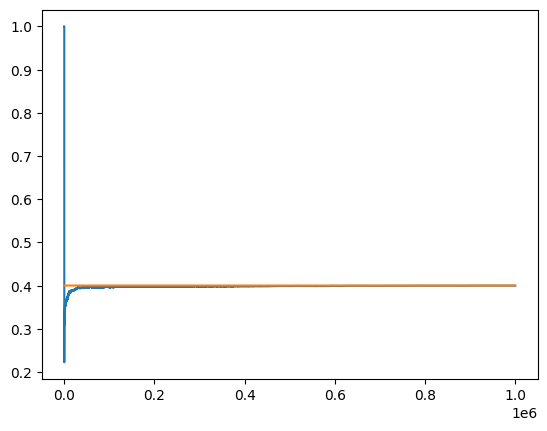

In [15]:
if __name__ == "__main__":
  # If they go anywhere below that range they are going to stop being selected.
  ucb_experiment()